# <center> Paper figures </center>

In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Linearity import Neuron
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
print plt.style.available
plt.style.use('seaborn-notebook')
# load libraries and set plot parameters
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-bright', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [12]:
#fileList = glob.glob("/media/sahil/NCBS_Shares_BGStim/patch_data/**/c?/plots/*.pkl")
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/CPP_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
print fileList, len(fileList)

['/media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/1_c4_150827/plots/1_c4_150827.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/2_c1_150828/plots/2_c1_150828.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/3_c1_150929/plots/3_c1_150929.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/6_c2_160513/plots/6_c2_160513.pkl', '/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/RS_TBS_short/5_c4_160122/plots/5_c4_160122.pkl', '/media/sahil/NCBS_Shares_BGStim/

### Figure 1

In [15]:
def figure1(feature = 0):
    ''' Plotting to show sublinearity of CA3 inputs at CA1. '''
    ratio = []
    numNeurons = 0
    for filename in fileList:
        print filename
        neuron = Neuron.load(filename)
        print "Cell {} on date {}".format(neuron.index, neuron.date)
        for experiment in neuron.experiment:
            if experiment == "Control":            
                numNeurons+=1
                for numSq in neuron.experiment[experiment]:
                    #if 5 in neuron.experiment[experiment]:
                    coords = neuron.experiment[experiment][numSq].coordwise
                    for coord in coords:
                        try:
                            if feature in coords[coord].average_feature and coords[coord].expected_feature:
                                if not np.isnan(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature]):
                                    ratio.append(coords[coord].average_feature[feature]/coords[coord].expected_feature[feature])
                        except:
                            print "Couldn't append to ratio, perhaps feature not found"
    ratio = np.array(ratio)
    gt_one = ratio[np.where(ratio>1)]
    frac_gt_one = round(float(len(gt_one))/len(ratio)*1e2,2)
    plt.hist(ratio, bins=100)
    plt.title("Sublinearity of input summation")
    plt.axvline(1.0, linestyle='dashed', linewidth=2)
    plt.xlabel("O/E")
    plt.ylabel("Frequency")
    plt.annotate("{} \%".format(frac_gt_one), xy=(1, 100), xytext=(1.5, 100), textcoords='data', arrowprops=dict(connectionstyle="arc3", arrowstyle = "<-"))
    plt.show()

    print "Legend text: Number of cells: {}, number of points: {}, fraction of points greater than one: {}".format(numNeurons, len(ratio), frac_gt_one )

## Figure 2

In [4]:
def figure2(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    numNeurons = 0
    numAP = 0
    numPSP = 0
    for filename in fileList:
        neuron = Neuron.load(filename)
        print "Cell {} on date {}".format(neuron.index, neuron.date)
        for experiment in neuron.experiment:
            if experiment == "Control":    
                numNeurons+=1
                for squares in neuron.experiment[experiment]:
                    nSq = neuron.experiment[experiment][squares].trial
                    for trialnum in nSq:
                        if nSq[trialnum].AP_flag:
                            numAP+=1
                        else:
                            numPSP+=1
    
    fracAPs = float(numAP)/numPSP
    fig, ax = plt.subplots()
    index = np.arange(2)
    width = 0.5
    ax.bar(index, (numPSP, numAP), width)
    ax.set_title("CA1 responses")
    ax.set_ylabel("Frequency")
    ax.set_xticks(index)
    ax.set_xticklabels(('PSP', 'AP'))
    plt.show()
    print "Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs)

## Figure 3

In [5]:
def figure3(feature=0):
    ''' Looking at the variability in PSPs for a given square'''
    numNeurons = 0
    coeff_var = []
    var = []
    mean = []
    squareNum = []
    for filename in fileList:
        neuron = Neuron.load(filename)
        print "Cell {} on date {}".format(neuron.index, neuron.date)
        for experiment in neuron.experiment:
            if experiment == "Control":            
                numNeurons+=1
                for numSq in neuron.experiment[experiment]:
                    coordwise = neuron.experiment[experiment][numSq].coordwise
                    for coord in coordwise:
                        try:
                            if len(coordwise[coord].trials) > 2:
                                var.append(np.var([trial.feature[feature]*1e3 for trial in coordwise[coord].trials]))
                                mean.append(coordwise[coord].average_feature[feature]*1e3)
                                coeff_var.append(np.std([trial.feature[feature]*1e3 for trial in coordwise[coord].trials])/(coordwise[coord].average_feature[feature]*1e3))
                                squareNum.append(numSq)
                        except:
                            print "Cannot find variance."
    coeff_var = np.array(coeff_var)
    var = np.array(var)
    mean = np.array(mean)
    
    withZeros = len(coeff_var)
    coeff_var = coeff_var[np.nonzero(coeff_var)]
    withoutZeros = len(coeff_var)
    
    plt.hist(coeff_var, bins=40)
    plt.title("Coefficient of variation")
    plt.xlabel("$\sigma/\mu$")
    plt.ylabel("Frequency")
    plt.show()
    
    r_p = 0.2 # Release probability
    plt.scatter(mean, var, c=squareNum, cmap='plasma')
    mean_axis = np.linspace(np.min(mean), np.max(mean),100)
    var_estimate = mean_axis*(1-r_p)
    plt.plot(mean_axis,var_estimate, '--')
    plt.title("Spread of the PSPs")
    plt.xlabel("$\mu$")
    plt.ylabel("$\sigma^2$")
    plt.colorbar()
    plt.show()
    print "Legend text: Number of cells: {}, number of points: {}".format(numNeurons, len(coeff_var) )

## Testing

In [6]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins=50): # Just to start with.
    c_xy = np.histogram2d(x, y)[0] # , bins
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def figure4():
    ''' Mutual information between the time to spike and expected excitation '''
    mut_OE = []
    mut_TE = []
    ratio = []
    numNeurons = 0
    for filename in fileList:
        neuron = Neuron.load(filename)
        print "Cell {} on date {}".format(neuron.index, neuron.date)
        expected = []
        observed = []
        time_peak = []
        for experiment in neuron.experiment:
            if experiment == "Control":            
                for numSq in neuron.experiment[experiment]:
                    if numSq>1:
                        numNeurons+=1
                        coordwise = neuron.experiment[experiment][numSq].coordwise
                        for coord in coordwise:
                            for trial in coordwise[coord].trials:
                                try:
                                    if len(coordwise[coord].trials)>1:
                                            expected.append(coordwise[coord].expected_feature[0])
                                            observed.append(trial.feature[0])
                                            time_peak.append(trial.feature[3])
                                    else:
                                        print len(coordwise[coord].trials)
                                except:
                                    pass
        if len(observed) and len(expected) and len(time_peak):
            mut_OE.append(calc_MI(observed, expected))
            mut_TE.append(calc_MI(time_peak, expected))
            ratio.append(mut_OE[-1]/mut_TE[-1])
            print ratio[-1]
    #plt.hist(mut_OE)
    #plt.hist(mut_TE)
    plt.hist(ratio)
    plt.show()

## Figure 1: CA1 almost always sums sublinearly to random inputs ( 1 vs. 5 )

/media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl
Cell c2 on date 150828
/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl
Cell c1 on date 150902
/media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl
Cell c2 on date 150902
/media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl
Cell c1 on date 150904
/media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl
Cell c3 on date 150904
/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/1_c4_150827/plots/1_c4_150827.pkl
Cell 1_c4_150827 on date Control_RS_short
/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/2_c1_150828/plots/2_c1_150828.pkl
Cell 2_c1_150828 on date Control_RS_short
/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Recording/Control_RS_short/3_c1_150929/plots/3_c1_150929.pkl
Cell 3_c1_150929 on date Control_RS_short
/media/sahil/NCBS_Shares_BGStim/patch_data/RS_Analysis/Patch_Re

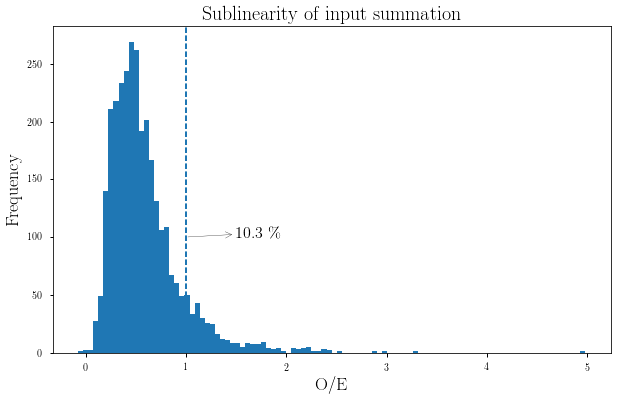

Legend text: Number of cells: 49, number of points: 3078, fraction of points greater than one: 10.3


In [16]:
figure1()

## Figure 2: CA1 responses are mostly subthreshold

Cell c2 on date 150828
Cell c1 on date 150902
Cell c2 on date 150902
Cell c1 on date 150904
Cell c3 on date 150904
Cell 1_c4_150827 on date Control_RS_short
Cell 2_c1_150828 on date Control_RS_short
Cell 3_c1_150929 on date Control_RS_short
Cell 6_c2_160513 on date Control_RS_short
Cell 5_c4_160122 on date RS_TBS_short
Cell c3 on date 160126
Cell c4 on date 160209
Cell c5 on date 160219
Cell c2 on date 160223
Cell c5 on date 160513
Cell c5 on date 160617
Cell c2 on date 160817
Cell c1 on date 160830
Cell c1 on date 160920
Cell c2_CS on date 170124
Cell c5 on date 160927
Cell c3 on date 160927
Cell c1 on date 160927
Cell c1 on date 161013
Cell c1 on date 161026
Cell c3 on date 161026
Cell c3 on date 161027
Cell c3 on date 161109
Cell c1 on date 161110
Cell c2 on date 161116
Cell c1 on date 161117
Cell c3_CS on date 161117
Cell c2_CS on date 161117
Cell c2_CS on date 161123
Cell c1_CS on date 161123
Cell c1 on date 161228
Cell c4 on date 170104
Cell c1 on date 170208
Cell c3 on date 1702

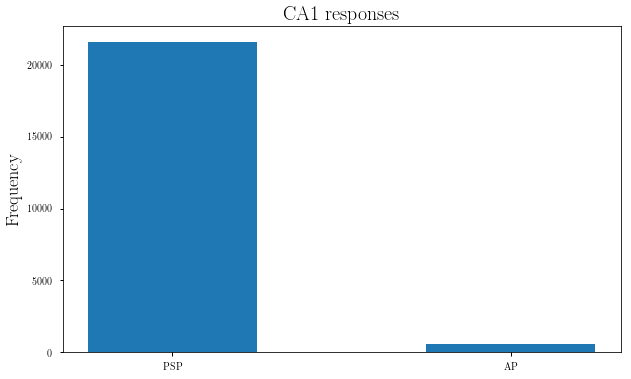

Legend text: Number of cells: 49, number of points: 22184, fraction of APS: 0.0279888785913


In [17]:
figure2()

## Figure 3: CA1 responses don't vary a lot (or as predicted by release probs?)

Cell c2 on date 150828
Cell c1 on date 150902
Cell c2 on date 150902
Cell c1 on date 150904
Cell c3 on date 150904
Cell 1_c4_150827 on date Control_RS_short
Cell 2_c1_150828 on date Control_RS_short
Cell 3_c1_150929 on date Control_RS_short
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cell 6_c2_160513 on date Control_RS_short
Cell 5_c4_160122 on date RS_TBS_short
Cell c3 on date 160126
Cell c4 on date 160209
Cell c5 on date 160219
Cell c2 on date 160223
Cell c5 on date 160513
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find variance.
Cannot find va

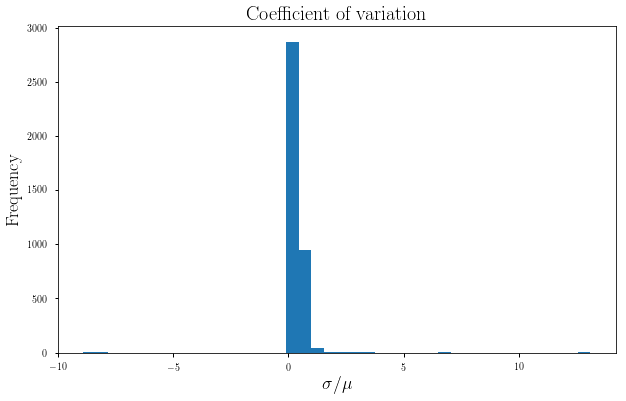

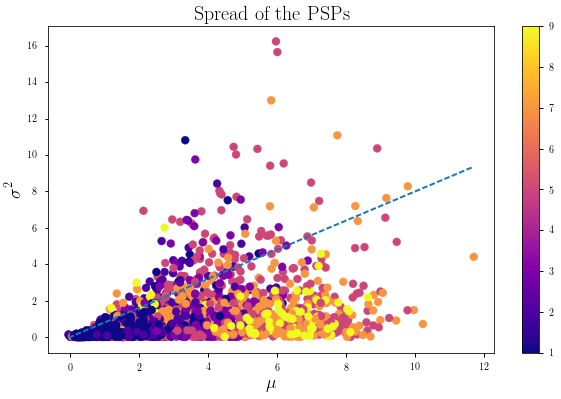

Legend text: Number of cells: 49, number of points: 3880


In [18]:
figure3() # Need to correct for variance (sample var, population variance)

In [ ]:
figure4()